In [22]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
import matplotlib.pyplot as plt
from snudda.utils.load import SnuddaLoad

In [23]:
external = os.path.join("/media","jofrony","2TB","dardel","current_bgd2","population_unit", "complete_network", "supercomputer", "networks")

In [24]:
folder = "frequency"

In [25]:
e = Experiments()
e.add_experiment(name="p0125_p1",
                 color="black",
                 label="p=0.125",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p0125"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-44-09_p1.hdf5")
e.add_experiment(name="p0125_p1_p2",
                 color="black",
                 label="p=0.125",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p0125"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-44-12_p1_p2.hdf5")
e.add_experiment(name="p025_p1",
                 color="blue",
                 label="p=0.25",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p025"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-45-19_p1.hdf5")
e.add_experiment(name="p025_p1_p2",
                 color="blue",
                 label="p=0.25",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p025"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-45-26_p1_p2.hdf5")
e.add_experiment(name="p05_p1",
                 color="green",
                 label="p=0.5",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p05"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-46-27_p1.hdf5")
e.add_experiment(name="p05_p1_p2",
                 color="green",
                 label="p=0.5",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p05"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-46-40_p1_p2.hdf5")

In [26]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p0125/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-44-09_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p0125/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-44-12_p1_p2.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p025/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-45-19_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/

In [27]:
%%time
neuron_type = "dSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
frequency_analysis_dict_dspn = frequency_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids, parameters={"start": 0.5, "end": 2.5})


CPU times: user 1min 43s, sys: 10.8 s, total: 1min 54s
Wall time: 9min 56s


In [28]:
%%time
neuron_type = "iSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
frequency_analysis_dict_ispn = frequency_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids, parameters={"start": 0.5, "end": 2.5})


CPU times: user 1min 35s, sys: 9.59 s, total: 1min 45s
Wall time: 9min 31s


In [29]:
frequency_analysis_dict = {i : dict() for i in [*e.experiments.keys()]}

In [30]:
for v, k in frequency_analysis_dict_dspn.items():
    frequency_analysis_dict[v].update(k)

In [31]:
for v, k in frequency_analysis_dict_ispn.items():
    frequency_analysis_dict[v].update(k)

In [32]:
colors = {"p0125_p1": "black",
         "p025_p1": "green",
         "p05_p1": "blue",
         "p0125_p1_p2": "black",
         "p025_p1_p2": "green" ,
         "p05_p1_p2": "blue"}
bins=10

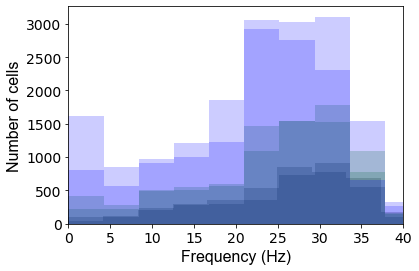

In [33]:
fig_name = f"{neuron_type}_above_0Hz"
plot_histogram_frequency(frequency_dict=frequency_analysis_dict, experiment_names=e,
                         fig_name=fig_name, 
                         colors=colors,bins=bins,
                         parameters={plt.xlim: (0,40)},
                         folder=folder, save=True)

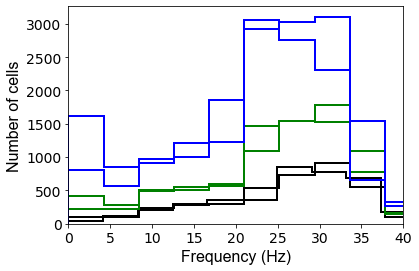

In [34]:
fig_name = f"{neuron_type}_above_0Hz"
plot_histogram_frequency_step(frequency_dict=frequency_analysis_dict, experiment_names=e,
                         fig_name=fig_name, 
                         colors=colors,bins=bins,
                         parameters={plt.xlim: (0,40)},
                         folder=folder, save=True)

In [35]:
mean_frequency_dict = mean_frequency(dictionary=frequency_analysis_dict, parameters={"interval": [0,60]})

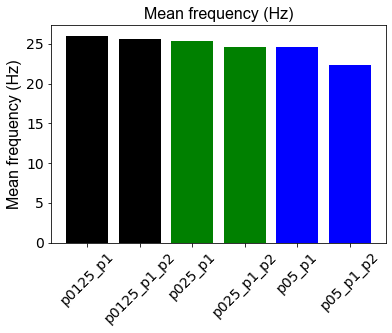

In [36]:
plot_mean_frequency(mean_frequency_dict = mean_frequency_dict, folder=folder,colors=colors, experiment_names=e)

In [37]:
parameters = dict(pairs=list())
for p in ["0125","025","05"]:
    parameters["pairs"].append([f"p{p}_p1", f"p{p}_p1_p2", f"p{p}"])
change = change_mean_frequency(dictionary=mean_frequency_dict, parameters=parameters)

In [38]:
colors = {"p0125": "black",
         "p025": "green" ,
         "p05": "blue"}

In [39]:
customize = {plt.ylim:(-2.5,0)}

In [40]:
fig_name = "activity_SPN"

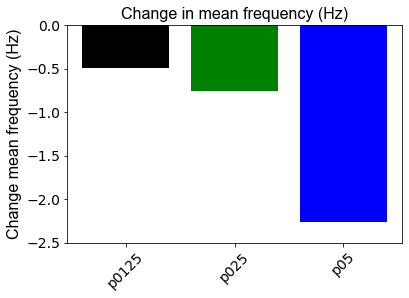

In [41]:
plot_change_mean_frequency(change_mean_frequency_dict = change, folder=folder,colors=colors, experiment_names=["p0125", "p025", "p05"],fig_name=fig_name, save=True, customize=customize)

In [72]:
import pandas as pd
import seaborn as sns
d = {"size": list(), "response": list()}
tmps = dict()
for distance in ["0125","025","05"]:
    tmps.update({distance: list()})
    for ids in [k for k in frequency_analysis_dict[f"p{distance}_p1"]][::50]:
        d["size"].append(f"p{distance}")
        diff = frequency_analysis_dict[f"p{distance}_p1_p2"][ids] - frequency_analysis_dict[f"p{distance}_p1"][ids]
        tmps[distance].append(diff)
        d["response"].append(diff)
df = pd.DataFrame(data=d)

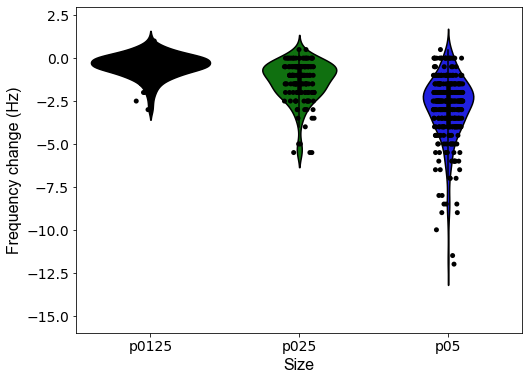

In [78]:
csfont = {"fontname": "Arial", 'fontsize': 16}
colors = {"p0125": "black",
         "p025": "green" ,
         "p05": "blue"}
plt.figure(figsize=(8, 6))
sns.violinplot(x="size", y="response", data=df,palette=colors)
sns.stripplot(x="size", y="response", data=df,
              color="black", edgecolor="gray")

plt.ylabel("Frequency change (Hz)", **csfont)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Frequency change (Hz)", **csfont)
plt.xlabel("Size", **csfont)
plt.ylim((-16,3))
plt.savefig(os.path.join("violin_frequency","complete_network_inhibition.svg"))